# **eCommerce Transactions**


# **Exploratory Data Analysis (EDA)**

# Importing necessary libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the datasets

In [2]:

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')




In [3]:
customers.head(), customers.describe(), customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
        CustomerID      CustomerName         Region  SignupDate
 count         200               200            200         200
 unique        200               200              4         179
 top         C0001  Lawrence Carroll  South America  2022-04-16
 freq            1                 1             59           3,
 None)

In [4]:
#Checking for missing values
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [5]:
products.head(), products.describe(), products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


(  ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
             Price
 count  100.000000
 mean   267.551700
 std    143.219383
 min     16.080000
 25%    147.767500
 50%    292.875000
 75%    397.090000
 max    497.760000,
 None)

In [6]:
#Checking for missing values
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [7]:
transactions.head(), transactions.describe(), transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


(  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  ,
           Quantity   TotalValue       Price
 count  1000.000000  1000.000000  1000.00000
 mean      2.537000   689.995560   272.55407
 std       1.117981   493.144478   140.73639
 min       1.000000    16.080000    16.08000
 25%       2.000000   295.295000   147.95000
 50%       3.000000   588.880000   299.93000
 75%       4.000000  1011.660000   404.40000
 max       4.000000  1991.040000   497.76000,
 None)

In [8]:
#Checking for missing values
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

# Analysis and Visualizations

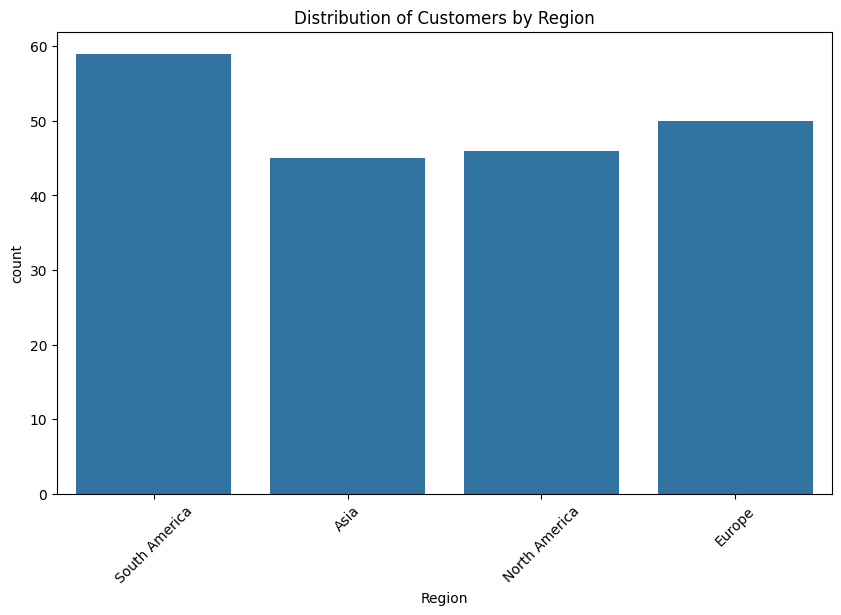

In [9]:
# Distribution of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Distribution of Customers by Region')
plt.xticks(rotation=45)
plt.show()

We can observe that by combining customer, product, and transaction data, you can perform more detailed analyses. For example, you can analyze how different customer segments interact with various products.

Merging the datasets is done to create a comprehensive view of the data that combines relevant information from multiple sources.

In [10]:
# Merging datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


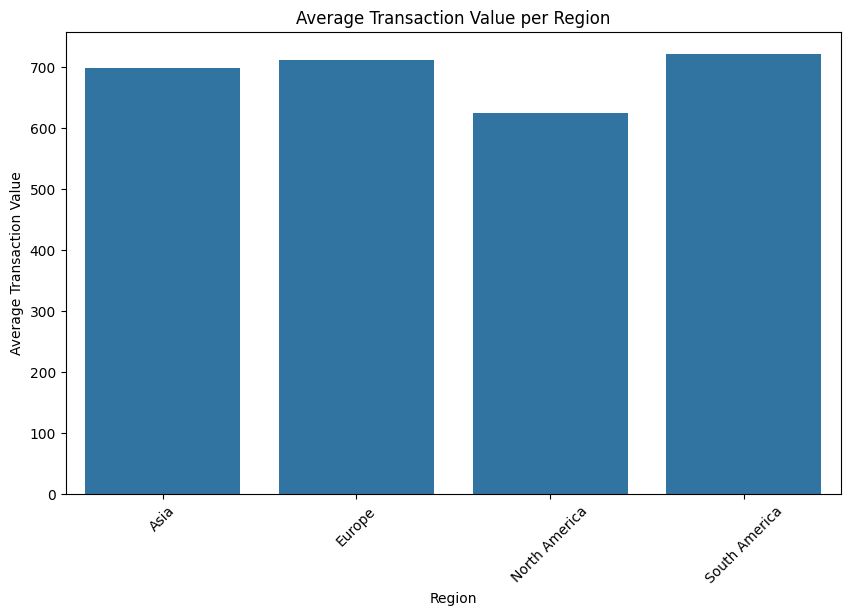

In [11]:
# Calculate average transaction value per region
average_transaction_value_by_region = merged_data.groupby('Region')['TotalValue'].mean()
print(average_transaction_value_by_region)

# Visualize average transaction value per region
plt.figure(figsize=(10, 6))
sns.barplot(x=average_transaction_value_by_region.index, y=average_transaction_value_by_region.values)
plt.title('Average Transaction Value per Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=45)
plt.show()

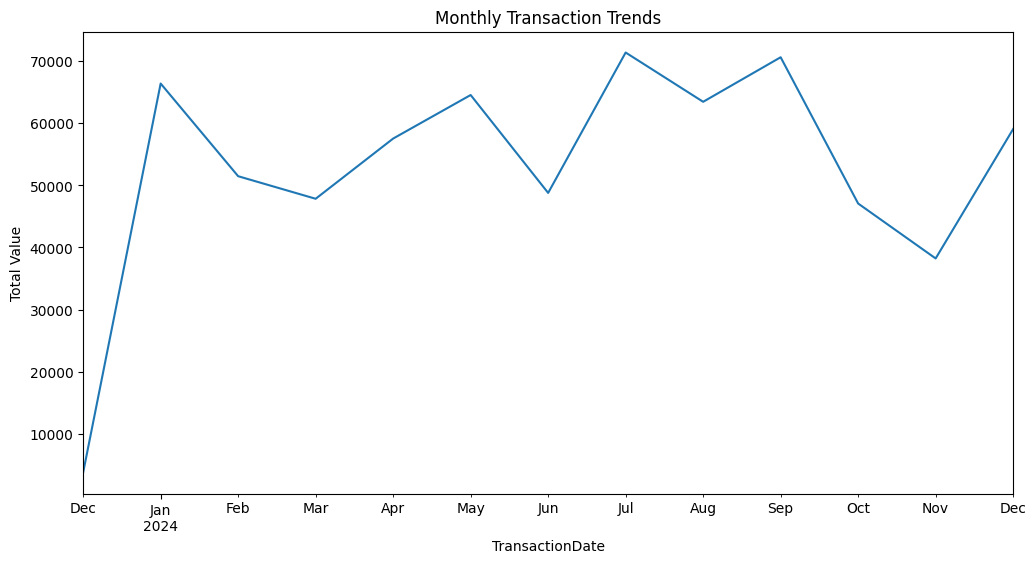

In [12]:
# Transaction trends over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.set_index('TransactionDate', inplace=True)
transactions.resample('ME').sum()['TotalValue'].plot(figsize=(12, 6))
plt.title('Monthly Transaction Trends')
plt.ylabel('Total Value')
plt.show()

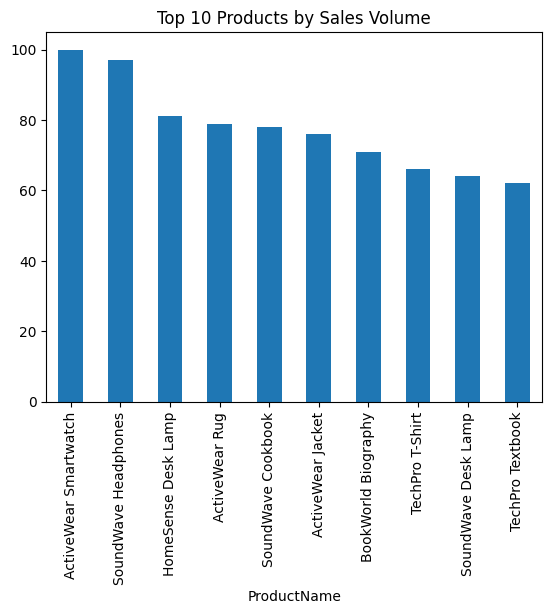

In [13]:
# Visualize top products by sales volume
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales Volume')
plt.show()

CustomerID
C0001    5
C0002    4
C0003    4
C0004    8
C0005    3
        ..
C0196    4
C0197    3
C0198    2
C0199    4
C0200    5
Name: TransactionID, Length: 199, dtype: int64


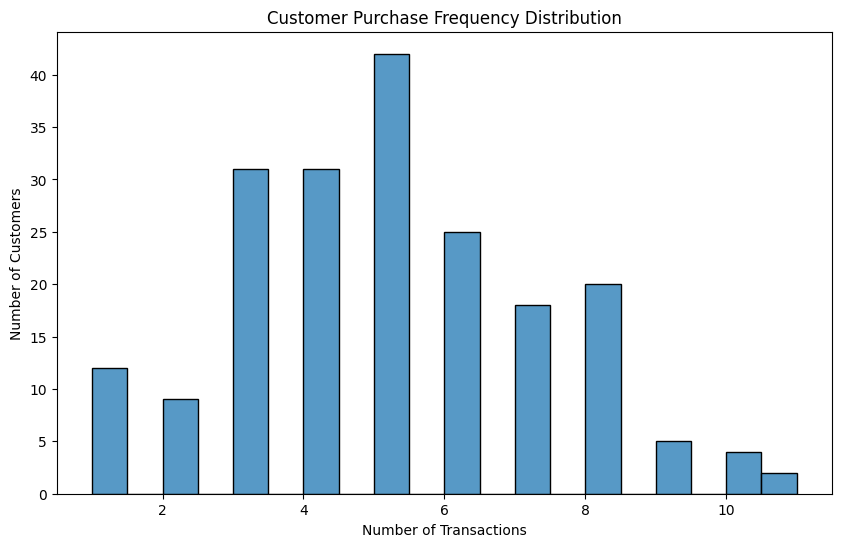

In [14]:
# Analyze customer purchase frequency
customer_purchase_frequency = merged_data.groupby('CustomerID')['TransactionID'].count()
print(customer_purchase_frequency)

# Visualize customer purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_frequency, bins=20)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()



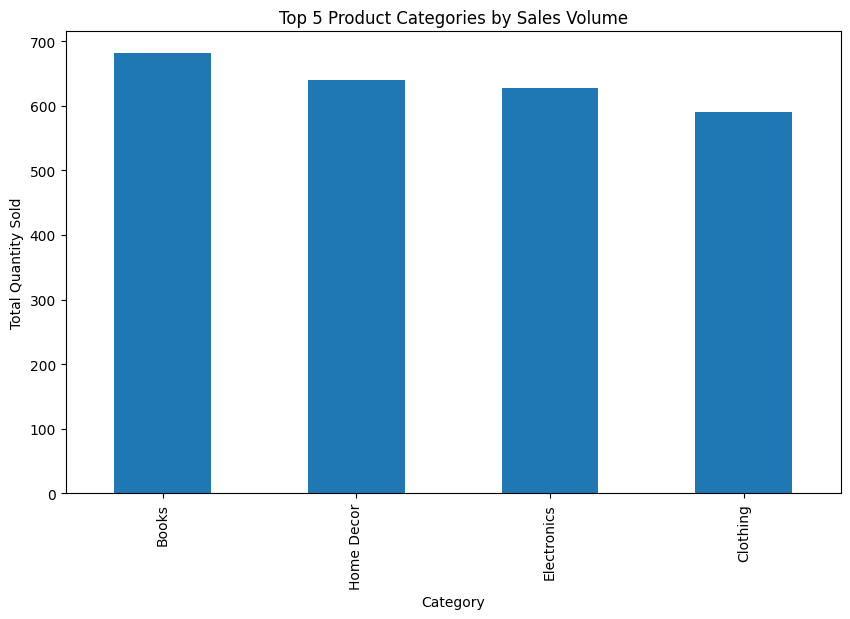

In [15]:
# Identify top selling product categories
top_categories = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(5)

# Visualize top selling categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 5 Product Categories by Sales Volume')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

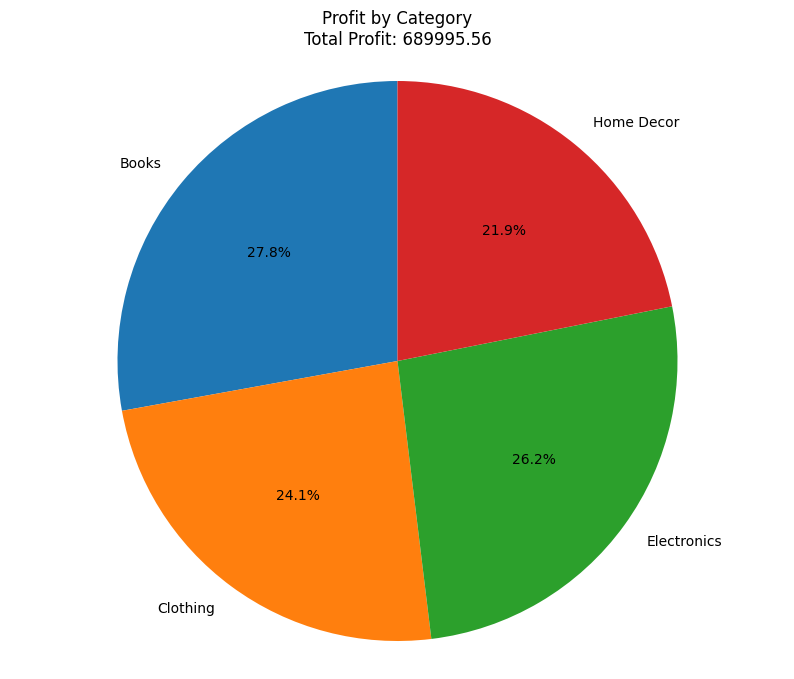

In [16]:
merged_data['Profit'] = merged_data['Price_y'] * merged_data['Quantity']
profit_by_category = merged_data.groupby('Category')['Profit'].sum()

# Calculate total profit
total_profit = profit_by_category.sum()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(profit_by_category, labels=profit_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Profit by Category\nTotal Profit: {total_profit}')
plt.axis('equal')
plt.show()